### Problem Statement

My goal, when undertaking this project, was to develop a model that could effectively predict the outcome of UFC fights, specifically, whether the fight would end in a judges decision, a knockout, a submission or a disqualification.

### Finding the Data

While my initial goal was to use data scraped from the official UFC website, UFC only keeps records and statistics for currently contracted fighters and did not have a section for alumni fighters. So to complete this project, I found a dataset on every UFC fighter that had, as of March 1st, 2016, competed in a sanctioned UFC fight. The data was scrapped from the MMA news and resource site, http://www.sherdog.com/.

From the same source, I also found a dataset with information on every single sancitioned UFC fight that had occured as of March 1st, 2016.

### Cleaning the Data
(For the complete breakdown of the actual cleaning and munging of the data, please refer to the Jupyter Notebook titled munging and cleaning code, located here https://github.com/msanders2288/DSI-SF-1-msanders2288/blob/master/Capstone_UFC/Munging_Cleaning_Code.ipynb)

To make the data usable, I first had to remove duplicate fighters from the fighter data set, which I did in Excel, then I brought the data into python.

Given that there was just over 3500 total fights, I could not afford to drop any fights that had NaN values, so I either had to manually add in missing values or impute those values where the data was unavailable.


In [1]:
import pandas as pd
import numpy as np

In [2]:
all_fights = pd.read_csv('Data Sets/Merged_Fights_Fighters.csv')
all_fights.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
all_fights.tail(10)

,event_place,f1result,f2result,f1fid,f2fid,method,method_d,ref,f1name,f1nick,...,f2nick,f2height,f2weight,f2association,f2class,f2locality,f2country,f1age,f2age,match_time
3559,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,58065,1326,Decision,Unanimous,Keith Peterson,Dennis Bermudez,The Menace,...,Crusher,67.0,145.0,T-Blood,Featherweight,"Inashiki, Ibaraki",Japan,30.0,38.0,15.000000
3560,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,17224,2765,KO/TKO,Knees,Mario Yamasaki,Chris Camozzi,None,...,Diesel,72.0,170.0,MMA Lab,Welterweight,"Phoenix, Arizona",United States,30.0,34.0,0.433333
3561,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,31766,34625,Decision,Unanimous,Keith Peterson,James Krause,The James Krause,...,Shaolin,72.0,155.0,Toshido Mixed Martial Arts,Lightweight,"Kelowna, British Columbia",Canada,30.0,28.0,15.000000
3562,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,30452,54124,KO/TKO,Punches,Bill Bookwalter,Sean Strickland,Tarzan,...,The Dominican Nightmare,69.0,171.0,Tristar Gym,Welterweight,"Montreal, Quebec",Canada,25.0,29.0,14.416667
3563,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,103153,17665,KO/TKO,Head Kick and Punches,James Chappell,Oluwale Bamgbose,The Holy War Angel,...,None,69.0,185.0,Power MMA,Middleweight,"Sao Paulo, Sao Paulo",Brazil,29.0,34.0,1.000000
3564,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,29470,14971,Decision,Unanimous,Chip Snider,Anthony Smith,Lionheart,...,Leleco,72.0,185.0,MMA Masters,Middleweight,"Salvador, Bahia",Brazil,28.0,34.0,15.000000
3565,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,25412,81634,Decision,Unanimous,Keith Peterson,Nathan Coy,Soulforce,...,Spyder,69.0,170.0,Renzo Gracie Philly,Welterweight,"Marlton, New Jersey",United States,38.0,27.0,15.000000
3566,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,75021,61266,Decision,Split,James Chappell,Ashlee Evans-Smith,None,...,The Bruiser,66.0,135.0,Elite Team,Bantamweight,"Visalia, California",United States,29.0,39.0,15.000000
3567,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,66725,117453,KO/TKO,Elbows and Punches,Bill Bookwalter,Lauren Murphy,None,...,None,68.0,145.0,Nor-Cal Fighting Alliance,Featherweight,"Santa Rosa, California",United States,33.0,30.0,14.916667
3568,"Consol Energy Center, Pittsburgh, Pennsylvania...",win,loss,26808,58947,Decision,Unanimous,Chip Snider,Shamil Abdurakhimov,Abrek,...,Freight Train,77.0,253.0,Jackson-Wink MMA,Heavyweight,"Seattle, Washington",United States,35.0,36.0,15.000000


### Adding the 'has nickname' binary

The initial plan was to gauge if there were actual patterns in the nickname chosen that offered some sort of edge, but this was outside of the scope of the project as it currently stands. Instead, I opted to dummy code in a binary for if the fighter had a nickname or not.

In [4]:
all_fights['f1nick_bin'] = all_fights['f1nick'].map(lambda x: 0 if x == 'None' else 1)
all_fights['f2nick_bin'] = all_fights['f2nick'].map(lambda x: 0 if x == 'None' else 1)

In [5]:
all_fights.columns

Index([u'event_place', u'f1result', u'f2result', u'f1fid', u'f2fid', u'method',
       u'method_d', u'ref', u'f1name', u'f1nick', u'f1height', u'f1weight',
       u'f1association', u'f1class', u'f1locality', u'f1country', u'f2name',
       u'f2nick', u'f2height', u'f2weight', u'f2association', u'f2class',
       u'f2locality', u'f2country', u'f1age', u'f2age', u'match_time',
       u'f1nick_bin', u'f2nick_bin'],
      dtype='object')

# Defining the data:
##### USED: Used in the modeling for the specified reason
##### NOT USED: Not used in the modeling for the specified reason

## Fight Categories:

#### event_place: The location of the fight
NOT USED: This data was ultimately not very useful in prediction so was left out of the models for the sake of performance. As UFC gains traction in all 50 states, this could be potentially included to see if a pattern is established, but as of now it is not a useful predictor.

#### ref: The referee of record for the fight
USED: Because fight stoppages for TKOs/KOs and DQs are at the referee's discretion this could be valuable in predicting the outcome of a fight.

#### method: The way the fight was one
TARGET: This was the initial target of the models. The 4 outcomes I attempted to predict were Decision, TKO/KO, Submissions or DQ.

#### method_d: The specific nature of the outcome
NOT USED: Because each sub method was tied to a specific out this was ultimately too specific and ultimately made prediction far less accurate.

#### match_time:
NOT USED: In the future, I would like to attempt to create a model that could predict in which round a fight would end, but this was very difficult as there is not a uniform length for fights. Non-title fights are three rounds total and Title fights are five rounds.

## Fighter Categories
###### The columns for the first fighter and second fighter, denoted with the f1 and f2 headers respectively, are the same so I will just explain what the fighter cateogries are once.

#### fid: The fighter's unique identifier
NOT USED: It's purpose was to aide in the merging of the data frames. This would have been redundant with the name category.

#### name: The fighter's name
USED: The hope was inclusion of this cateogry would help establish a pattern if they had a particular preference for method of victory.

#### age: Fighter age at the time of the fight
USED: This was included to see if their was any edge gained by life experience or if youth played more of a factor.

#### result: Denotes if the figher won or lost
NOT USED: The goal was to predict the method of victory and less focused on the winner themself

#### nick: Fighter nickname
NOT USED: The initial plan was to gauge if there were actual paterns in choosing a nickname that offered some sort of edge, but this was outside of the scope of the project as it currently stands.

#### nick_bin: A binary to note if the fighter has a nickname or does not
USED: A general cateogry to help see if choosing a nickname afforded any advantage to fighters as opposed to those who opted to not choose a nickname

#### weight: Fighters weight in pounds
USED: This is the most commonly used metric in what is called the 'Tale of the Tape'. Weight is measured near the beginning of a fight to make sure fighters are legally within the allowd weight class

#### class: Fighter weight class
USED: Fights under common rules are only contested between members of the same weight class. This was included to see if the weight classes showed any perference to a certian outcome.

#### height: Fighter height in inches
USED: The other most commonly used metric in the 'Tale of the Tape'. Height is not bound by class like weight.

#### locality: Where the figher is billed from
USED: This was included to see if certain locations showed a endency to certain outcomes

#### country: Where the fighter is initially from
USED: Sometimes, but not always related to the locality, a fighter's billed locale is irrespective of their birth place which is why this was not left out as it could potentially have a an effect on the type of outcome favored by a fighter.

#### association: The gym, team or training facility
USED: This was included to see if fighters training with certain associations had a perference for how they ended fights or if those without a formal association showed any combined tendencies.



# Prepping the Data

I made the decision to remove fights ruled as 'No Contest' as the reason was that almost all of the fights were ruled a no contest do to drug infractions.

In [6]:
#mask to remove contested fights
mask_no_contest_1 = ((all_fights.method != 'No Contest - Hoffman Failed Drug Test') & 
                   (all_fights.method != 'No Contest - Overturned by State Commission') &
                    (all_fights.method != 'No') & (all_fights.method != "NC") & 
                    (all_fights.method != 'No Contest - Caceres Failed Drug Test') & 
                     (all_fights.method != 'No Contest - Overturned by Commission' ) & 
                     (all_fights.method !='No Contest') & (all_fights.method != 'Draw'))
# df_contested fights
fights = all_fights[mask_no_contest_1]

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Visualizations

To gaing a better understanding of the data, I first made a bar chat to show the number of fights broken down by weight class.

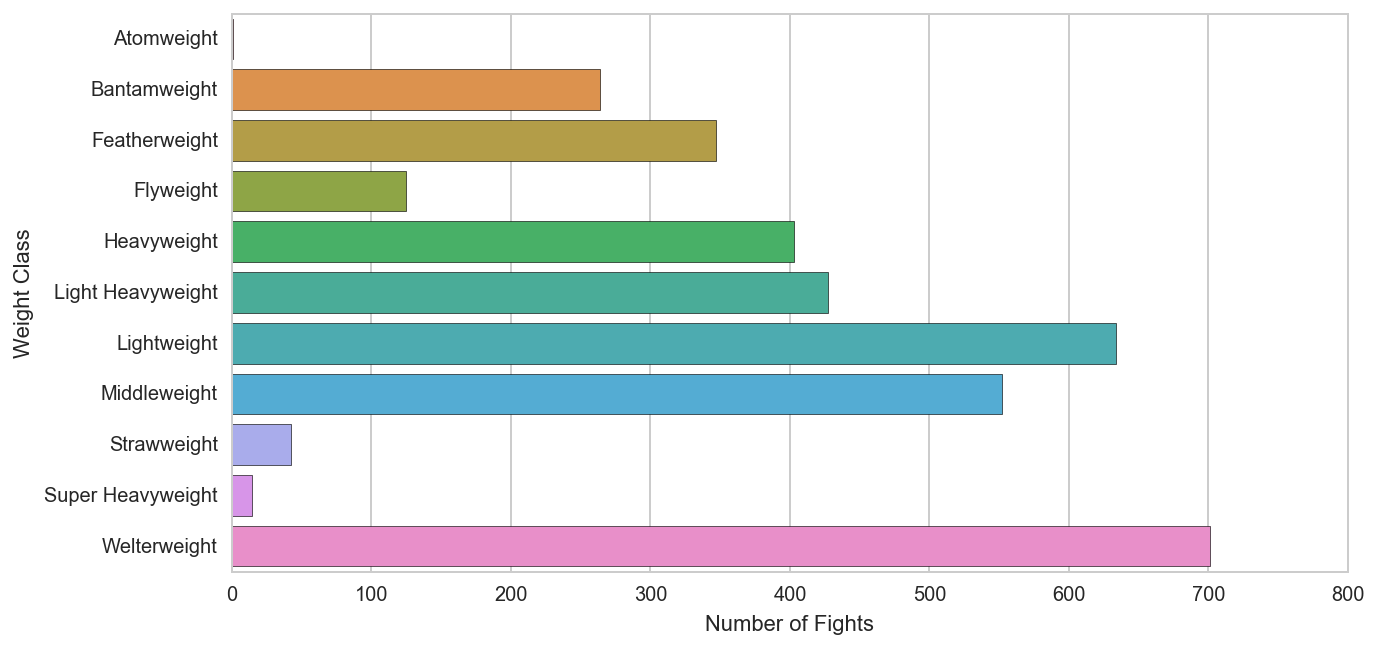

In [8]:
fights_by_class = fights.groupby(['f1class'])['method'].count()
fights_by_class = pd.DataFrame(fights_by_class)
fights_by_class = fights_by_class.reset_index()
plt.figure(figsize = (10,5))
sns.barplot(x = 'method', y = 'f1class', data = fights_by_class)
sns.axlabel(xlabel = 'Number of Fights', ylabel = 'Weight Class')

Then, to better understand the breakdown of what I was attempting to predict I graphed how many of each outcome there were in the history of UFC.

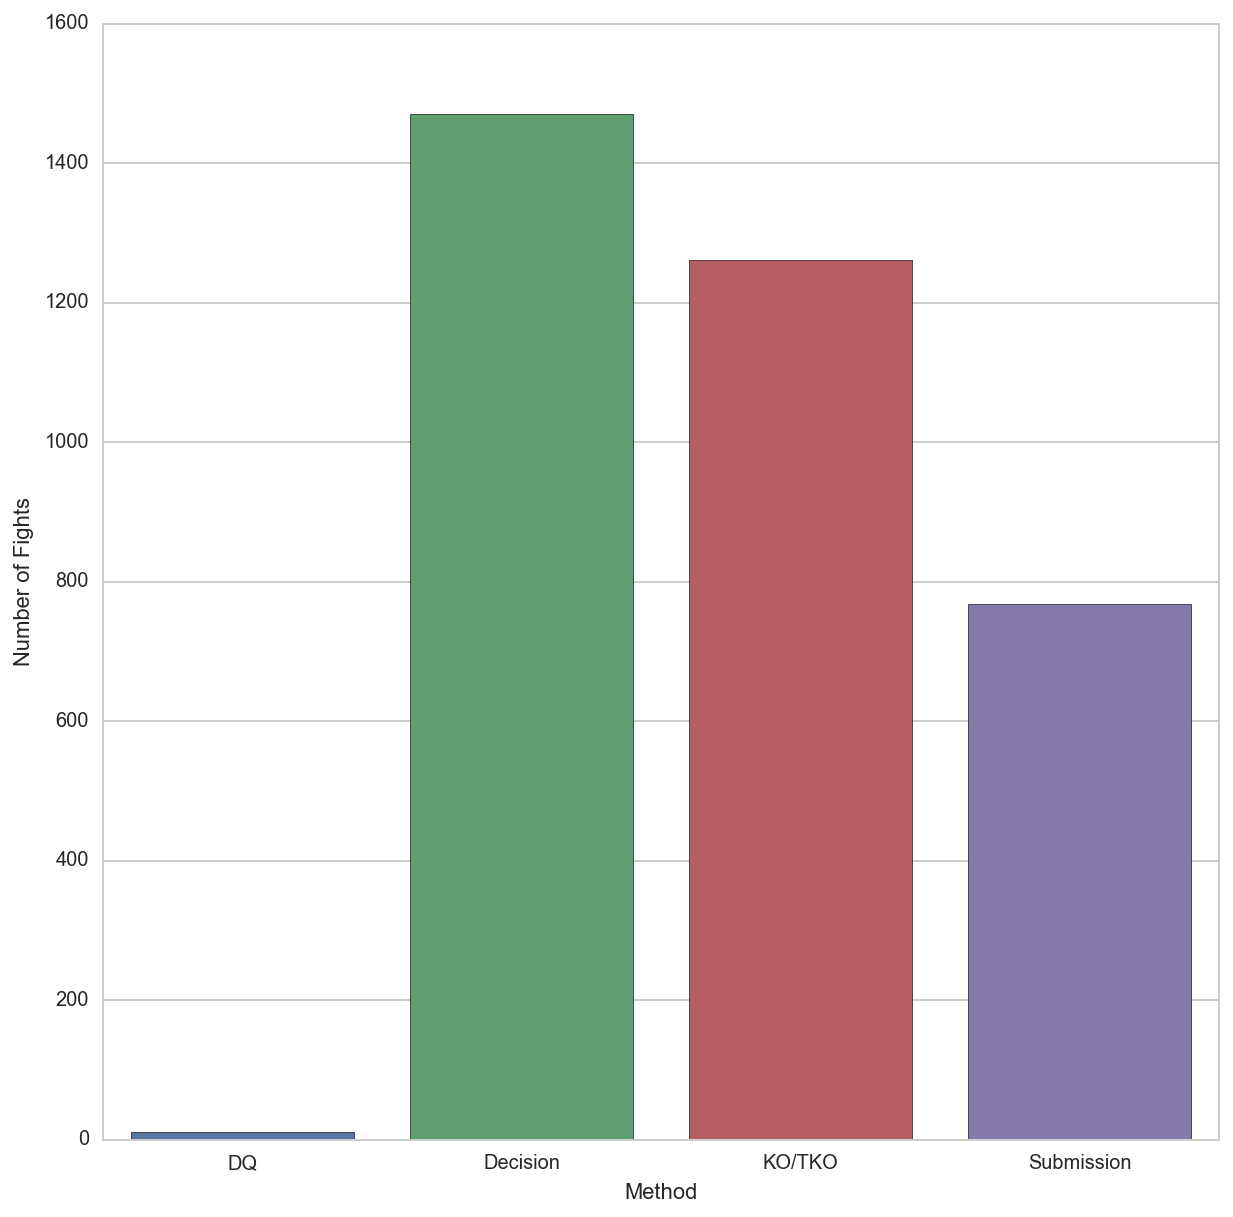

In [54]:
fights_by_dec = fights.groupby(['method'])['f1result'].count()
fights_by_dec = pd.DataFrame(fights_by_dec)
fights_by_dec = fights_by_dec.reset_index()
plt.figure(figsize = (10,10))
sns.barplot(x = 'method', y = 'f1result', data = fights_by_dec)
sns.axlabel(xlabel = 'Method', ylabel = 'Number of Fights')

#### Target Variable Creation:

Because I wanted to use the modeling tools in patsy, I went through and dummy coded each method with an integer. Attempting to use patsy with the dummy coding led to errors in the creation of my target variables and in the execution of my selected models.

In [11]:
method_code = []
for method in fights['method']:
    if method == 'Decision':
        x = 0
    elif method == 'KO/TKO':
        x = 1
    elif method == 'Submission':
        x = 2
    elif method == 'DQ':
        x = 3
    method_code.append(x)
    
# Including these target names for use later  in classification reports
target_names = ['Decision', 'KO/TKO', 'Submission', 'DQ']

In [12]:
fights['method_code'] = method_code
fights['method_code'].value_counts()

/Users/mikesanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0    1470
1    1261
2     768
3      11
Name: method_code, dtype: int64

### Creating the models

The code below was to establish the baseline of accuracy for the data to see how my models performed.

In [13]:
1470./fights.shape[0]


0.4188034188034188

In [14]:
#Creating the formula and data frame to use
import statsmodels.formula.api as smf
import patsy
formula = 'method_code ~ C(ref) + C(f1name) + f1height + f1weight + C(f1association) + C(f1class) + C(f1locality) + C(f1country) + C(f2name) + f2height + f2weight + C(f2association) + C(f2class) + C(f2locality) + C(f2country) + f1age + f2age + f1nick_bin + f2nick_bin - 1'
Y,X = patsy.dmatrices(formula, data=fights, return_type = "dataframe")
y = np.ravel(Y)
print X.shape
print y.shape

(3510, 5128)
(3510,)


## Model Selection:

Because the goal of my models was classification, the models I chose were Logsitic Regression, Stochastic Gradient Descent Classifier, k-Nearest Neighbors Classifier, Decesion Tree Classifier and Random Forest Classifier.

In [15]:
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV()
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

### Determining Feature Regularization (Logistic Regression and Stochastic Gradient Descent)

Because of the large number of categorical variables, I decided to use Logistic Regression with either the lasso or ridge penalty to see if any features could be removed or at last scaled down. After Gridsearching, the best parmater came with the l2 (Ridge) penalty.

I then moved to Stochastic Gradient Descent to see if including the elastic net penalty paramter would help improve the score or help remove any unnecessary penalties. Unfortunately, the model performed worse then the logistic regression using the l2 penalty.

In [17]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Cs = 1.0/np.logspace(-1,4,20)

search_parameters_lr = {
    'penalty': ['l1','l2'],
    'C': Cs,
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear'],
    'n_jobs': [4]
    }

lr_est = GridSearchCV(lr, search_parameters_lr, cv=5)

In [18]:
lr_grid = lr_est.fit(X,y)
print lr_grid.best_params_
print lr_grid.best_score_


{'penalty': 'l2', 'C': 0.0037926901907322499, 'n_jobs': 4, 'solver': 'liblinear', 'class_weight': None}
0.477492877493


In [19]:
lr_best = LogisticRegression(penalty= 'l2', C= 0.0037926901907322499, n_jobs = 4, solver= 'liblinear', class_weight= None)

In [20]:
lr_best.fit(X,y)

LogisticRegression(C=0.00379269019073, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=4, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

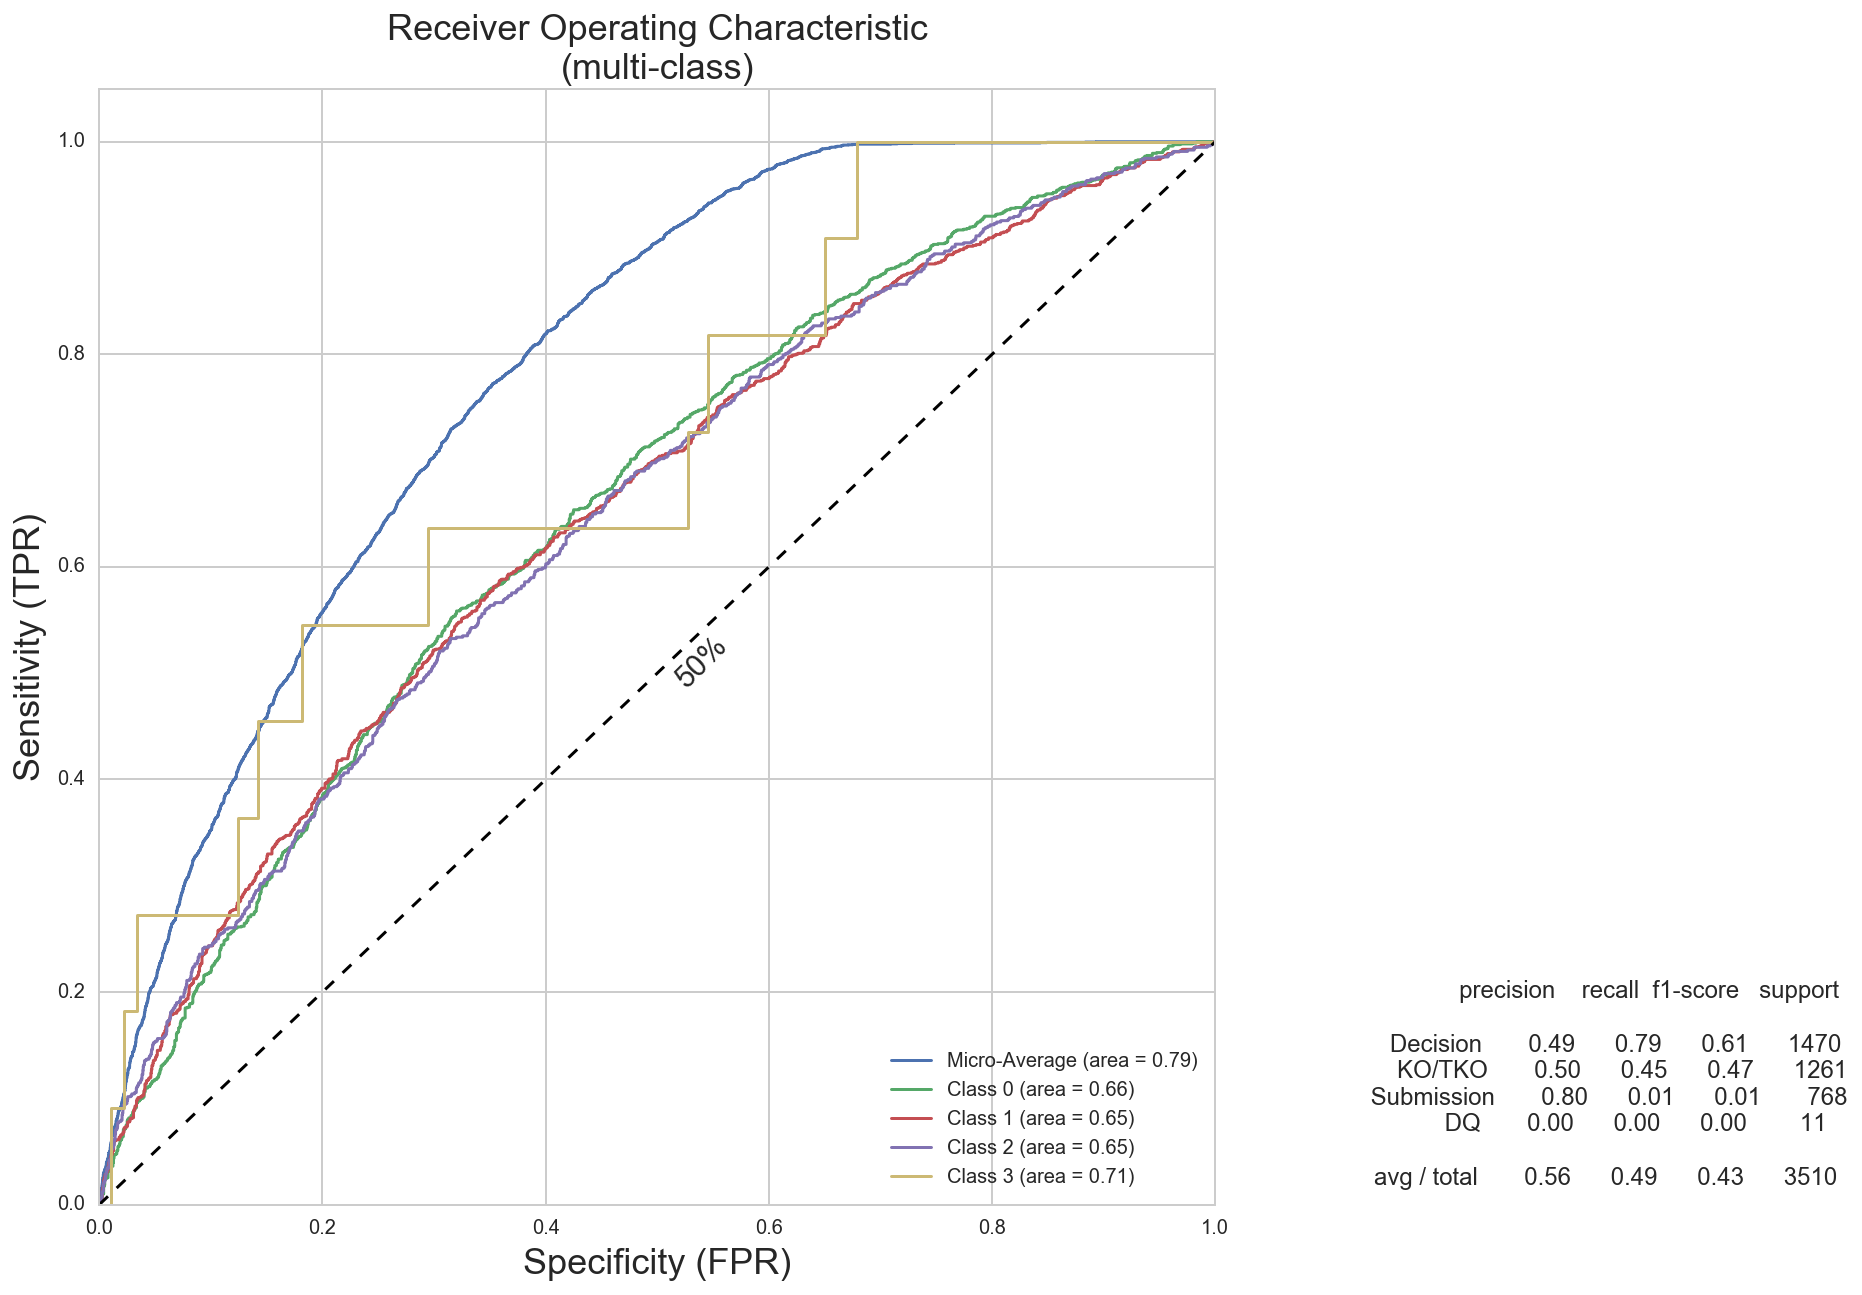

In [133]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
class multi_roc:
    
    # model / estimator
    estimator = False
    line_width = 1.5
    
    
    def __init__(self, estimator):
        self.estimator = estimator
        
        if "classes_" not in vars(estimator):
            raise Exception("EstimatorError", "Estimator has no fit data.  Run .fit()")
                            
    def plot(self, X_test, y_test, verbose=False, filter_class=False, figsize=(10,10)):
        _ = ""
        
        # Get predictions if classification report
        if verbose:
            predicted = self.estimator.predict(X_test)
            report = classification_report(y_test, predicted, target_names=target_names)
           
            
        
        y_score = self.estimator.decision_function(X_test)
        y = label_binarize(y_test, classes=self.estimator.classes_)
        
        n_classes = y.shape[1]
        
        fpr = dict()
        tpr = dict()
        
        roc_auc = dict()
        
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
            roc_auc[self.estimator.classes_[i]] = auc(fpr[i], tpr[i])
        
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        if filter_class:
            # Plot of a ROC curve for a specific class
            figure = plt.figure()
            figure.set_size_inches(figsize[0], figsize[1])
            plt.plot(fpr[2], tpr[2], label='ROC curve (area = {1:0.2f})' % roc_auc[2], figsize=(10,10))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic example')
            plt.legend(loc="lower right")
            plt.show()
            
            return
        
 
        
        # Plot ROC curve
        
        # setup grid layout, 1 column X 3x rows
        plt.figure(figsize=figsize)
        #gs = gridspec.GridSpec(3, 1)
        #ax1 = plt.subplot(gs[0:2, 0])
         
        plt.plot(fpr["micro"], tpr["micro"],
                 label='Micro-Average (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=self.line_width)
        
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})'
                                           ''.format(i, roc_auc[i]), linewidth=self.line_width)
        
        # 50 / 50 line
        myplot = plt.plot([0, 1], [0, 1], 'k--', linewidth=self.line_width)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Specificity (FPR)', fontsize=18)
        plt.ylabel('Sensitivity (TPR)', fontsize=18)
        plt.title('Receiver Operating Characteristic\n(multi-class)', fontsize=18)
        plt.legend(loc="lower right")
       
        #y=[1,2,3,4,5,4,3,2,1,1,1,1,1,1,1,1]
        #plt.plot([10,10,14,14,10],[2,4,4,2,2],'r')
        #col_labels=['col1','col2','col3']
        #row_labels=['row1','row2','row3']
        #table_vals=[[11,12,13],[21,22,23],[31,32,33]]
        # the rectangle is where I want to place the table
        #the_table = plt.table(cellText=table_vals,
        #                  colWidths = [0.1]*3,
        #                  rowLabels=row_labels,
        #                  colLabels=col_labels,
        #                  loc='center right')
        
        #plt.text(24,13.4,'Table Title',size=8)
        bbox_props = dict(boxstyle="square,pad=0.3", fc="none", ec="b", lw=0)
        t = plt.text(.54, .51, "50%", ha="center", va="center", rotation=45,
                   size=15,
                   bbox=bbox_props)
        
        bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=0)
        t = plt.text(1.35, .10, report, ha="center", va="center",
                   size=12,
                   bbox=bbox_props)
        
        plt.show()

roc = multi_roc(estimator = lr_best)
roc.plot(X, y, verbose=True, figsize=(10,10))

In [70]:
# alpha = np.logspace(start = 0.000001 , stop = 5 ,num =  20)

search_parameters_sgd = {
    'loss': ['log'],
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'l1_ratio': [0,.1,.25,.5,.75,.9,1],
    'alpha': [.0000001,1, .00001,.0001,.001,.1,],
    'n_iter': [1,2,3,4,5,6],
    'shuffle': [True, False]
    }

sgd_est = GridSearchCV(sgd, search_parameters_sgd, cv=5)

In [71]:
sgd_grid = sgd_est.fit(X,y)
print sgd_grid.best_params_
print sgd_grid.best_score_

{'n_iter': 3, 'shuffle': True, 'loss': 'log', 'l1_ratio': 0.9, 'penalty': 'l1', 'alpha': 1e-05}
0.465242165242


In [74]:
sgd_best = SGDClassifier(penalty = 'l1', l1_ratio= .9, n_iter = 3, shuffle =  True, loss =  'log', alpha = .00001)

In [75]:
sgd_best.fit(X,y)

SGDClassifier(alpha=1e-05, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.9, learning_rate='optimal',
       loss='log', n_iter=3, n_jobs=1, penalty='l1', power_t=0.5,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

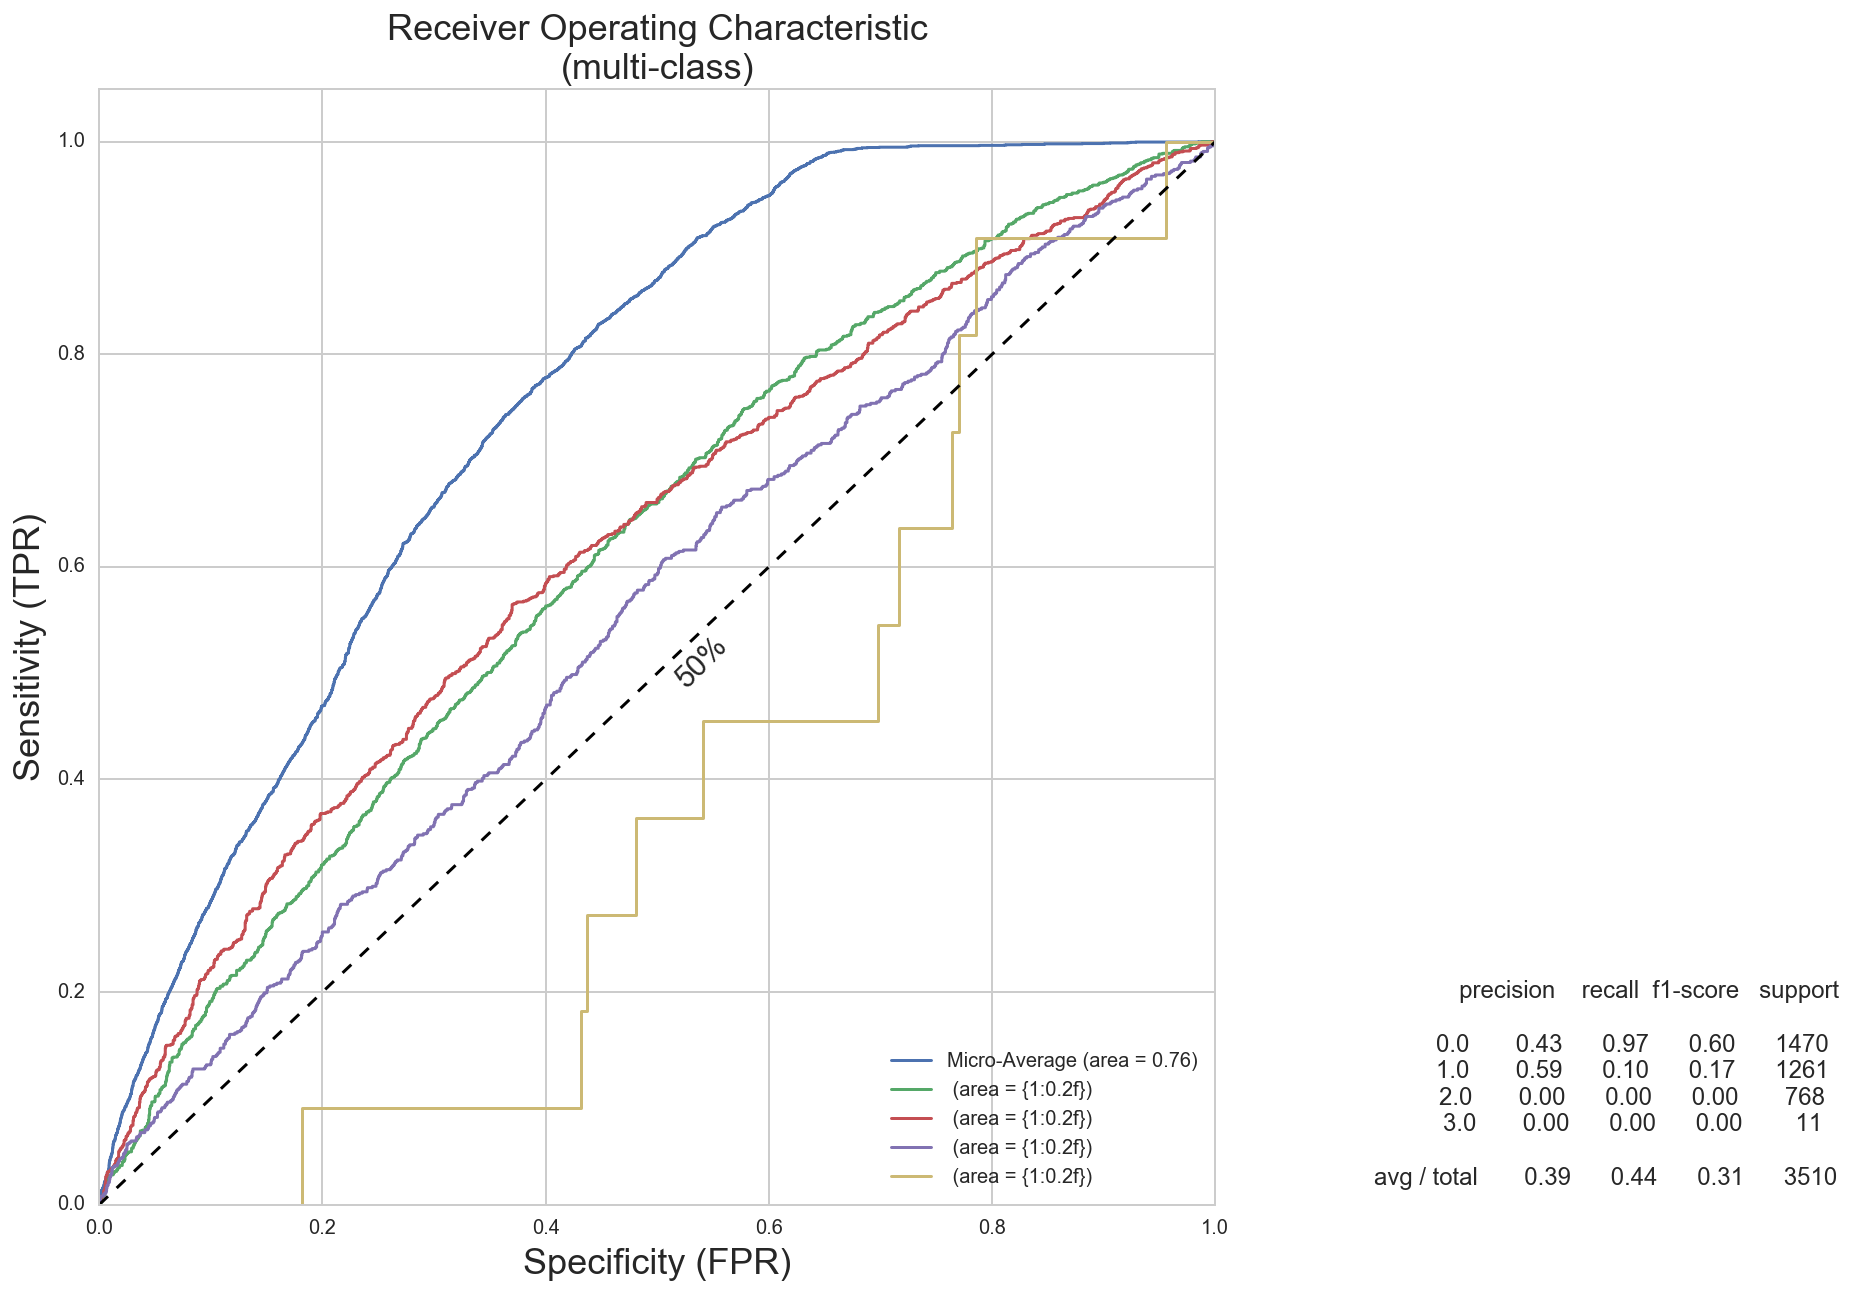

In [78]:
roc = multi_roc(estimator = sgd_best)
roc.plot(X, y, verbose=True, figsize=(10,10))

### Modeling for speed and prediction power

I decided to use k-Nearest Neighbors because of the relative speed in gridsearching and fitting and because it can be a powerful tool in prediction.

The kNN model yielded a score on par with base line accuracy, so I ultimately had to discard it.

In [27]:
search_parameters_knn = {
    
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [5, 10, 30, 40, 50],
    'n_neighbors': [1,3,5,7],
    'n_jobs': [4],
    'p': [2],
    'metric': ['minkowski']
    }

knn_est = GridSearchCV(knn, search_parameters_knn, cv=5)

In [ ]:
knn_grid = knn_est.fit(X,y)
print knn_grid.best_params_
print knn_grid.best_score_

In [28]:
knn_best = KNeighborsClassifier(weights = 'uniform' , algorithm = 'auto', leaf_size = 50 , n_neighbors = 5 , n_jobs = 4, p = 2,  metric = 'minkowski')

In [29]:
knn_best.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
y_pred_knn = knn_best.predict(X)

In [31]:
print classification_report(y, y_pred_knn, target_names = target_names)

             precision    recall  f1-score   support

   Decision       0.58      0.81      0.68      1470
     KO/TKO       0.62      0.56      0.59      1261
 Submission       0.65      0.27      0.38       768
         DQ       0.00      0.00      0.00        11

avg / total       0.61      0.60      0.58      3510



## Models for Prediction:

Because both the Logistic Regression and Stochastic Gradient opted to not remove any of the predictors and because of the lower score of the kNN classifier, I elected to try a Decision Tree Classifier and then boost it with a Random Forest Classifier because of their high predictve power and ability to handle large amounts of predictors.

The Decision Tree ultimately gave a slightly better score then the Random Forest Classifier, but at a depth of three as oppposed to a depth of five. Moving forward, I would elect to use the Decision Tree for predictions as the Random Forest Classifier may have overfit to the current training data.

In [32]:
search_parameters_dtc = {
    
    'criterion': ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth': [2,3,4,5, None],
    'max_features': ['auto', 'sqrt', 'log2', None]
    }

dtc_est = GridSearchCV(DTC, search_parameters_dtc, cv=5)

In [ ]:
dtc_grid = dtc_est.fit(X,y)
print dtc_grid.best_params_
print dtc_grid.best_score_

In [33]:
dtc_best = DecisionTreeClassifier(max_features= None, splitter ='best', criterion =  'gini', max_depth = 3)
dtc_best.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [81]:
features =  pd.DataFrame(dtc_best.feature_importances_)

In [84]:
mask = features[0] > 0.0

In [85]:
features[mask]

,0
1343,0.053837
4212,0.163566
5121,0.168484
5123,0.495432
5124,0.073943
5125,0.044738


In [34]:
y_pred_dtc = dtc_best.predict(X)

In [35]:
print classification_report(y, y_pred_dtc, target_names=target_names)

             precision    recall  f1-score   support

   Decision       0.49      0.70      0.58      1470
     KO/TKO       0.47      0.51      0.49      1261
 Submission       0.74      0.04      0.08       768
         DQ       0.00      0.00      0.00        11

avg / total       0.54      0.49      0.44      3510



In [36]:
search_parameters_rfc = {
    'n_estimators': [20,30, 40, 50],
    'criterion': ['gini', 'entropy'],
    'max_depth': [4,5,6, None],
    'max_features': ['auto', 'sqrt', 'log2', None]
    }
rfc_est = GridSearchCV(rfc, search_parameters_rfc, cv=5)

In [ ]:
rfc_grid = rfc_est.fit(X,y)
print rfc_grid.best_params_
print rfc_grid.best_score_

In [37]:
rfc_best = RandomForestClassifier(max_features= 'sqrt', n_estimators = 40, criterion = 'gini', max_depth = 5)

In [38]:
rfc_best.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
y_pred_rfc = rfc_best.predict(X)

In [40]:
print classification_report(y, y_pred_rfc, target_names=target_names)

             precision    recall  f1-score   support

   Decision       0.46      0.95      0.62      1470
     KO/TKO       0.60      0.23      0.33      1261
 Submission       1.00      0.01      0.01       768
         DQ       0.00      0.00      0.00        11

avg / total       0.63      0.48      0.38      3510



# Future Steps:

Going forward I would like to add in some more predictors, especially armreach and leg reach. These statistics have only recently been tracked by UFC officials and used by fights handicappers. I would also try and break down the models above by weight class to see if there is a preference for one method of victory over any another in each weight class.

# In Summation:

Based off the trends in recent fights to go longer and the general increase in parity amongst fighters, in terms of access to prepatory and training equipment, the safest bet would always be to bet on a fight "going the distance" or the full three or five rounds. However, due to the evolution of the sport, with a higher precedent placed on protecting fighters, it is still quite possible for fights to end in what could be described as a 'lucky punch' and a KO, technical or otherwise.